In [1]:
import scipy
from scipy import misc
import glob
from PIL import Image
import matplotlib.pyplot as plt

from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

Using TensorFlow backend.
/home/student/.local/lib/python3.6/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


/home/student/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


MÃ¤rchenbilder, Op_113 Nicht schnellPROCESSED.wav


/home/student/.local/lib/python3.6/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


FantasiestÃ¼cke Op 73 I Zart und mit Ausdruck_PROCESSED.wav
Viola Sonata Op 105 a-moll I Mit leidenschaftlichem Ausdruck_PROCESSED.wav
viola sonata op 120 no 1 in F minor Andante Con Poco Adagio_PROCESSED.wav
FantasiestÃ¼cke, Op 73 II Lebhaft leicht_PROCESSED.wav
FantasiestÃ¼cke, Op_73 III Rasch und mit FeuerPROCESSED.wav
MÃ¤rchenbilder, Op 113 IV Langsam_PROCESSED.wav
viola sonata op 120 no 1 in F minor Allegretto Grazioso_PROCESSED.wav
Viola Sonata Op 105 a-moll III Lebhaft_PROCESSED.wav
viola sonata op 120 no 1 in F minor Vivace_PROCESSED.wav
MÃ¤rchenbilder, Op 113 II Lebhaft_PROCESSED.wav
MÃ¤rchenbilder, Op 113 III Rasch_PROCESSED.wav
viola sonata op 120 no 1 in F minor Allegro_PROCESSED.wav
Viola Sonata Op 105 a-moll II Allegretto_PROCESSED.wav
Violin Sonata No 1 in A minor Op 105  II Allegrato_PROCESSED.wav
Violin Sonata, L 140 II Intermede_PROCESSED.wav
Sonata No 3 in D Minor Op 108 I Allegro_PROCESSED.wav
Violin Sonata No 1 in A minor Op 105  III Lebhaft_PROCESSED.wav
Romance i

/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Valse scherzo (Tchaikovsky)_PROCESSED.wav
Violin Sonata, L 140 III Finale_PROCESSED.wav
Sonata No 3 in D Minor Op 108 IV Presto_PROCESSED.wav
Sonata No 3 in D Minor Op 108 II Adagio_PROCESSED.wav
Violin Sonata, L140 I Allegro vivo_PROCESSED.wav
viola sonata op 120 no 1 in F minor Allegretto Grazioso_PROCESSED.wav
Sonata No 3 in D Minor Op 108 III Un poco_PROCESSED.wav
viola sonata op 120 no 1 in F minor Vivace_PROCESSED.wav


<Figure size 432x288 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

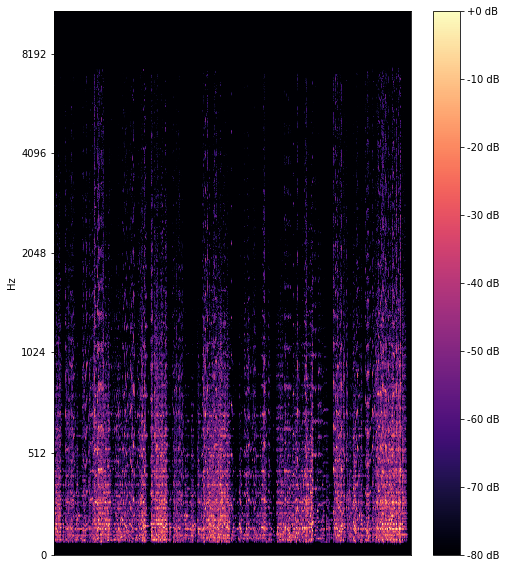

In [2]:
import os
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import numpy as np
import math
os.chdir('/home/student/Downloads/new_violin_viola/romantic/viola/combined_train')
x1=[]
y_train=[]
mfcc_list_mean = []
mfcc_list_std = []

freqViolin = []
freqViola = []
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/romantic/viola/combined_train'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        #temp = x/x.max()  #normalization
        #S = librosa.feature.melspectrogram(temp, sr=sr, n_mels=128)  # 128 mel bands
        #mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=13)
        #tempList = list(np.mean(mfcc,1))
        #tempList1 = list(np.std(mfcc,1))
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/romantic/train_combined/viola/{f_name[:-4]}.png')
        
        
os.chdir('/home/student/Downloads/new_violin_viola/romantic/violin/combined_train')  
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/romantic/violin/combined_train'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/romantic/train_combined/violin/{f_name[:-4]}.png')



Adagio and Allegro in A-Flat Major Op 70 Langsam mit innigem Ausdruck (Adagio)_PROCESSED.wav
MÃ¤rchenerzÃ¤hlungen for Clarinet, Viola and Piano, Op_PROCESSED.wav
Mikhail Glinka - Viola Sonata in D Minor_PROCESSED.wav
Adagio and Allegro in A-Flat Major, Op 70 Rasch und feurig_PROCESSED.wav
Tchaikovsky, Viola, Passion Confession_PROCESSED.wav
Viola Sonata in C Minor, Movement 1, Adagio - Allegro_ Felix Mendelssohn_PROCESSED.wav
5 Gedichte WWV 91 V TrÃ¤ume (Wagner)_PROCESSED.wav
Song Without Words Op 2 No 3 (Tchaikovsky)_PROCESSED.wav
Das Lied der Geige Op 2 (Schebek)_PROCESSED.wav
3 Pieces Op 11 Mazurka in F-Sharp Minor (Chopin)_PROCESSED.wav
Hungarian Dance No 1 WoO 1_PROCESSED.wav
Tchaikovsky, Viola, Passion Confession_PROCESSED.wav


<Figure size 432x288 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

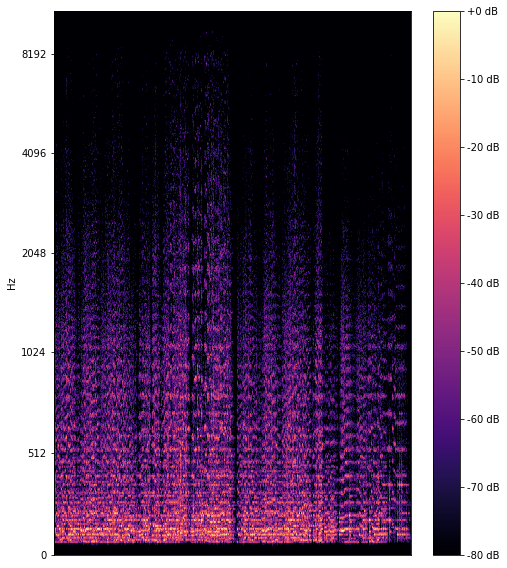

In [3]:
os.chdir('/home/student/Downloads/new_violin_viola/romantic/viola/combined_test')
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/romantic/viola/combined_test'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        #temp = x/x.max()  #normalization
        #S = librosa.feature.melspectrogram(temp, sr=sr, n_mels=128)  # 128 mel bands
        #mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=13)
        #tempList = list(np.mean(mfcc,1))
        #tempList1 = list(np.std(mfcc,1))
       
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/romantic/test_combined/viola/{f_name[:-4]}.png')
        
        
os.chdir('/home/student/Downloads/new_violin_viola/romantic/violin/combined_test')  
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/romantic/violin/combined_test'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/romantic/test_combined/violin/{f_name[:-4]}.png')


    

In [2]:
train_dir = "/home/student/Downloads/new_violin_viola_dl/romantic/train_combined/"
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator =train_data.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=2,subset='training')


validation_generator=train_data.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=2,subset='validation')

testing_dir = "/home/student/Downloads/new_violin_viola_dl/romantic/test_combined/"
testing_data = ImageDataGenerator(rescale=1./255)
testing_generator = testing_data.flow_from_directory(testing_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=2)


Found 24 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [3]:
def GenreModel(input_shape = (288,432,4),classes=2):
  
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(128,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)
  
  

  X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [7]:
import keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

  
model = GenreModel(input_shape=(288,432,4),classes=2)
opt = Adam(learning_rate=0.0015)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy', 'mae']) 

history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
12/12 [==============================] - 1s 98ms/step - loss: 10.3948 - accuracy: 0.5833 - mae: 0.4067 - val_loss: 0.7374 - val_accuracy: 0.5000 - val_mae: 0.4988
Epoch 2/30
12/12 [==============================] - 0s 21ms/step - loss: 7.0261 - accuracy: 0.5833 - mae: 0.4159 - val_loss: 0.7640 - val_accuracy: 0.5000 - val_mae: 0.4963
Epoch 3/30
12/12 [==============================] - 0s 26ms/step - loss: 2.9834 - accuracy: 0.5417 - mae: 0.5071 - val_loss: 0.7228 - val_accuracy: 0.5000 - val_mae: 0.4918
Epoch 4/30
12/12 [==============================] - 0s 23ms/step - loss: 1.8413 - accuracy: 0.6667 - mae: 0.3723 - val_loss: 2.3247 - val_accuracy: 0.5000 - val_mae: 0.4995
Epoch 5/30
12/12 [==============================] - 0s 24ms/step - loss: 2.1257 - accuracy: 0.3333 - mae: 0.6004 - val_loss: 1.6568 - val_accuracy: 0.5000 - val_mae: 0.4977
Epoch 6/30
12/12 [==============================] - 0s 25ms/step - loss: 0.9062 - accuracy: 0.5833 - mae: 0.4547 - val_loss: 0.6463 - 

In [8]:
model.evaluate(testing_generator)

6/6 [==============================] - 0s 21ms/step


[0.23171010613441467, 0.75, 0.3013063967227936]

In [6]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1
